In [1]:
import os
import math

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

from numpy import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from xgboost import XGBClassifier

from sklearn.impute import KNNImputer

from sklearn.svm import SVC

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

rd_seed = 333

## Načtení dat

In [2]:
path_file = os.sep.join(['created_data', 'matrix_semestr_5.csv'])
matrix_bak = pd.read_csv(path_file, sep=",")

## Info o datasetu

In [3]:
matrix_bak['BI-LIN_poradi_zapisu'].value_counts()

 1.0    837
 2.0    291
-1.0     12
Name: BI-LIN_poradi_zapisu, dtype: int64

In [4]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   studium_id               1140 non-null   int64  
 1   dokoncil_semestr         1140 non-null   float64
 2   BI-PA1_znamka            1140 non-null   float64
 3   BI-PA1_poradi_zapisu     1140 non-null   float64
 4   BI-PAI_znamka            1140 non-null   float64
 5   BI-PAI_poradi_zapisu     1140 non-null   float64
 6   BI-CAO_znamka            1140 non-null   float64
 7   BI-CAO_poradi_zapisu     1140 non-null   float64
 8   BI-PS1_znamka            1140 non-null   float64
 9   BI-PS1_poradi_zapisu     1140 non-null   float64
 10  BI-MLO_znamka            1140 non-null   float64
 11  BI-MLO_poradi_zapisu     1140 non-null   float64
 12  BI-ZMA_znamka            1140 non-null   float64
 13  BI-ZMA_poradi_zapisu     1140 non-null   float64
 14  pocet_kreditu_semestr_1 

In [5]:
matrix_bak.mean()

studium_id                 1.431253e+07
dokoncil_semestr           9.745614e-01
BI-PA1_znamka              2.017105e+00
BI-PA1_poradi_zapisu       1.047368e+00
BI-PAI_znamka              2.099561e+00
BI-PAI_poradi_zapisu       9.219298e-01
BI-CAO_znamka              1.018860e+00
BI-CAO_poradi_zapisu       8.745614e-01
BI-PS1_znamka              2.107895e+00
BI-PS1_poradi_zapisu       1.058772e+00
BI-MLO_znamka              1.798246e+00
BI-MLO_poradi_zapisu       9.605263e-01
BI-ZMA_znamka              1.915789e+00
BI-ZMA_poradi_zapisu       1.028070e+00
pocet_kreditu_semestr_1    2.709123e+01
BI-PA2_znamka              2.014912e+00
BI-PA2_poradi_zapisu       1.205263e+00
BI-DBS_znamka              1.652632e+00
BI-DBS_poradi_zapisu       9.350877e-01
BI-SAP_znamka              1.531140e+00
BI-SAP_poradi_zapisu       9.350877e-01
BI-LIN_znamka              2.430702e+00
BI-LIN_poradi_zapisu       1.234211e+00
pocet_kreditu_semestr_2    2.515000e+01
BI-AAG_znamka              2.223246e+00


## Příprava datasetu

### Nastavení indexu

In [6]:
matrix_bak = matrix_bak.set_index(['studium_id'])

### Nastavení atributů na kategorické - ordinální

In [7]:
# ordinální
grades_category = pd.api.types.CategoricalDtype(categories=[-1, 1, 1.5, 2, 2.5, 3, 4], ordered=True)
# BI-PA1
matrix_bak['BI-PA1_znamka'] = matrix_bak['BI-PA1_znamka'].astype(grades_category)
# BI-PAI
matrix_bak['BI-PAI_znamka'] = matrix_bak['BI-PAI_znamka'].astype(grades_category)
# BI-CAO
matrix_bak['BI-CAO_znamka'] = matrix_bak['BI-CAO_znamka'].astype(grades_category)
# BI-PS1
matrix_bak['BI-PS1_znamka'] = matrix_bak['BI-PS1_znamka'].astype(grades_category)
# BI-MLO
matrix_bak['BI-MLO_znamka'] = matrix_bak['BI-MLO_znamka'].astype(grades_category)
# BI-ZMA
matrix_bak['BI-ZMA_znamka'] = matrix_bak['BI-ZMA_znamka'].astype(grades_category)
# BI-PA2
matrix_bak['BI-PA2_znamka'] = matrix_bak['BI-PA2_znamka'].astype(grades_category)
# BI-DBS
matrix_bak['BI-DBS_znamka'] = matrix_bak['BI-DBS_znamka'].astype(grades_category)
# BI-SAP
matrix_bak['BI-SAP_znamka'] = matrix_bak['BI-SAP_znamka'].astype(grades_category)
# BI-LIN
matrix_bak['BI-LIN_znamka'] = matrix_bak['BI-LIN_znamka'].astype(grades_category)
# BI-AG1
matrix_bak['BI-AG1_znamka'] = matrix_bak['BI-AG1_znamka'].astype(grades_category)
# BI-AAG
matrix_bak['BI-AAG_znamka'] = matrix_bak['BI-AAG_znamka'].astype(grades_category)
# BI-ZDM
matrix_bak['BI-ZDM_znamka'] = matrix_bak['BI-ZDM_znamka'].astype(grades_category)
# BI-OSY
matrix_bak['BI-OSY_znamka'] = matrix_bak['BI-OSY_znamka'].astype(grades_category)
# BI-PSI
matrix_bak['BI-PSI_znamka'] = matrix_bak['BI-PSI_znamka'].astype(grades_category)
# BI-BEZ
matrix_bak['BI-BEZ_znamka'] = matrix_bak['BI-BEZ_znamka'].astype(grades_category)

In [8]:
matrix_bak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 14267106 to 17376606
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   dokoncil_semestr         1140 non-null   float64 
 1   BI-PA1_znamka            1140 non-null   category
 2   BI-PA1_poradi_zapisu     1140 non-null   float64 
 3   BI-PAI_znamka            1140 non-null   category
 4   BI-PAI_poradi_zapisu     1140 non-null   float64 
 5   BI-CAO_znamka            1140 non-null   category
 6   BI-CAO_poradi_zapisu     1140 non-null   float64 
 7   BI-PS1_znamka            1140 non-null   category
 8   BI-PS1_poradi_zapisu     1140 non-null   float64 
 9   BI-MLO_znamka            1140 non-null   category
 10  BI-MLO_poradi_zapisu     1140 non-null   float64 
 11  BI-ZMA_znamka            1140 non-null   category
 12  BI-ZMA_poradi_zapisu     1140 non-null   float64 
 13  pocet_kreditu_semestr_1  1140 non-null   float64 
 1

## Modelování

### Bakalář všechny pp

#### Rozdělení datasetu

In [9]:
Xdata = matrix_bak.drop(columns='dokoncil_semestr')
ydata = matrix_bak.dokoncil_semestr

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state=rd_seed, stratify=ydata, shuffle=True) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(1140, 36)

(1140,)

trénovací data


(912, 36)

(912,)

testovací data


(228, 36)

(228,)

#### Funkce pro vybrání vhodných hyperparametrů pomocí křížové validace

In [11]:
def get_best_parameters(param_grid, classifier, xgb=None):
    score = 'f1'
    if xgb:
        model = GridSearchCV(classifier(eval_metric='mlogloss', use_label_encoder=False, tree_method="gpu_hist", enable_categorical=True), param_grid, cv=5, scoring=score)
    else:
        model = GridSearchCV(classifier(), param_grid, cv=5, scoring=score)
    model.fit(Xtrain, ytrain)

    print('Best hyper-parameters are: ')
    print(model.best_params_)
    print()

    means = model.cv_results_["mean_test_score"]
    stds = model.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, model.cv_results_["params"]):
        print("%0.6f (+/-%0.06f) for %r" % (mean, std * 2, params))
    print()
    return model

#### Rozhodovací strom

In [12]:
param_grid = [
    {'criterion':['gini','entropy'],
    'max_depth': range(2,7),
    'min_samples_leaf':[10]}
]

In [13]:
dt_f1 = get_best_parameters(param_grid, DecisionTreeClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}

0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.984350 (+/-0.012842) for {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.984350 (+/-0.012842) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.984350 (+/-0.012842) for {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10}
0.987230 (+/-0.002710) for {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10}
0.987230 (+/-0.002710) for {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.987230 (+/-0.002710) for {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 10}
0.982702 (+/-0.005568) for {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
0.982702 (+/-0.005568) for {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10}



In [14]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt_f1.predict(Xtest))))

accuracy score (train): 0.974781
accuracy score (test): 0.973684


In [15]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':dt_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
12,pocet_kreditu_semestr_1,0.457909
33,BI-BEZ_znamka,0.353792
28,pocet_kreditu_semestr_3,0.188300
0,BI-PA1_znamka,0.000000
26,BI-AG1_znamka,0.000000
21,pocet_kreditu_semestr_2,0.000000
22,BI-AAG_znamka,0.000000
23,BI-AAG_poradi_zapisu,0.000000
24,BI-ZDM_znamka,0.000000
25,BI-ZDM_poradi_zapisu,0.000000


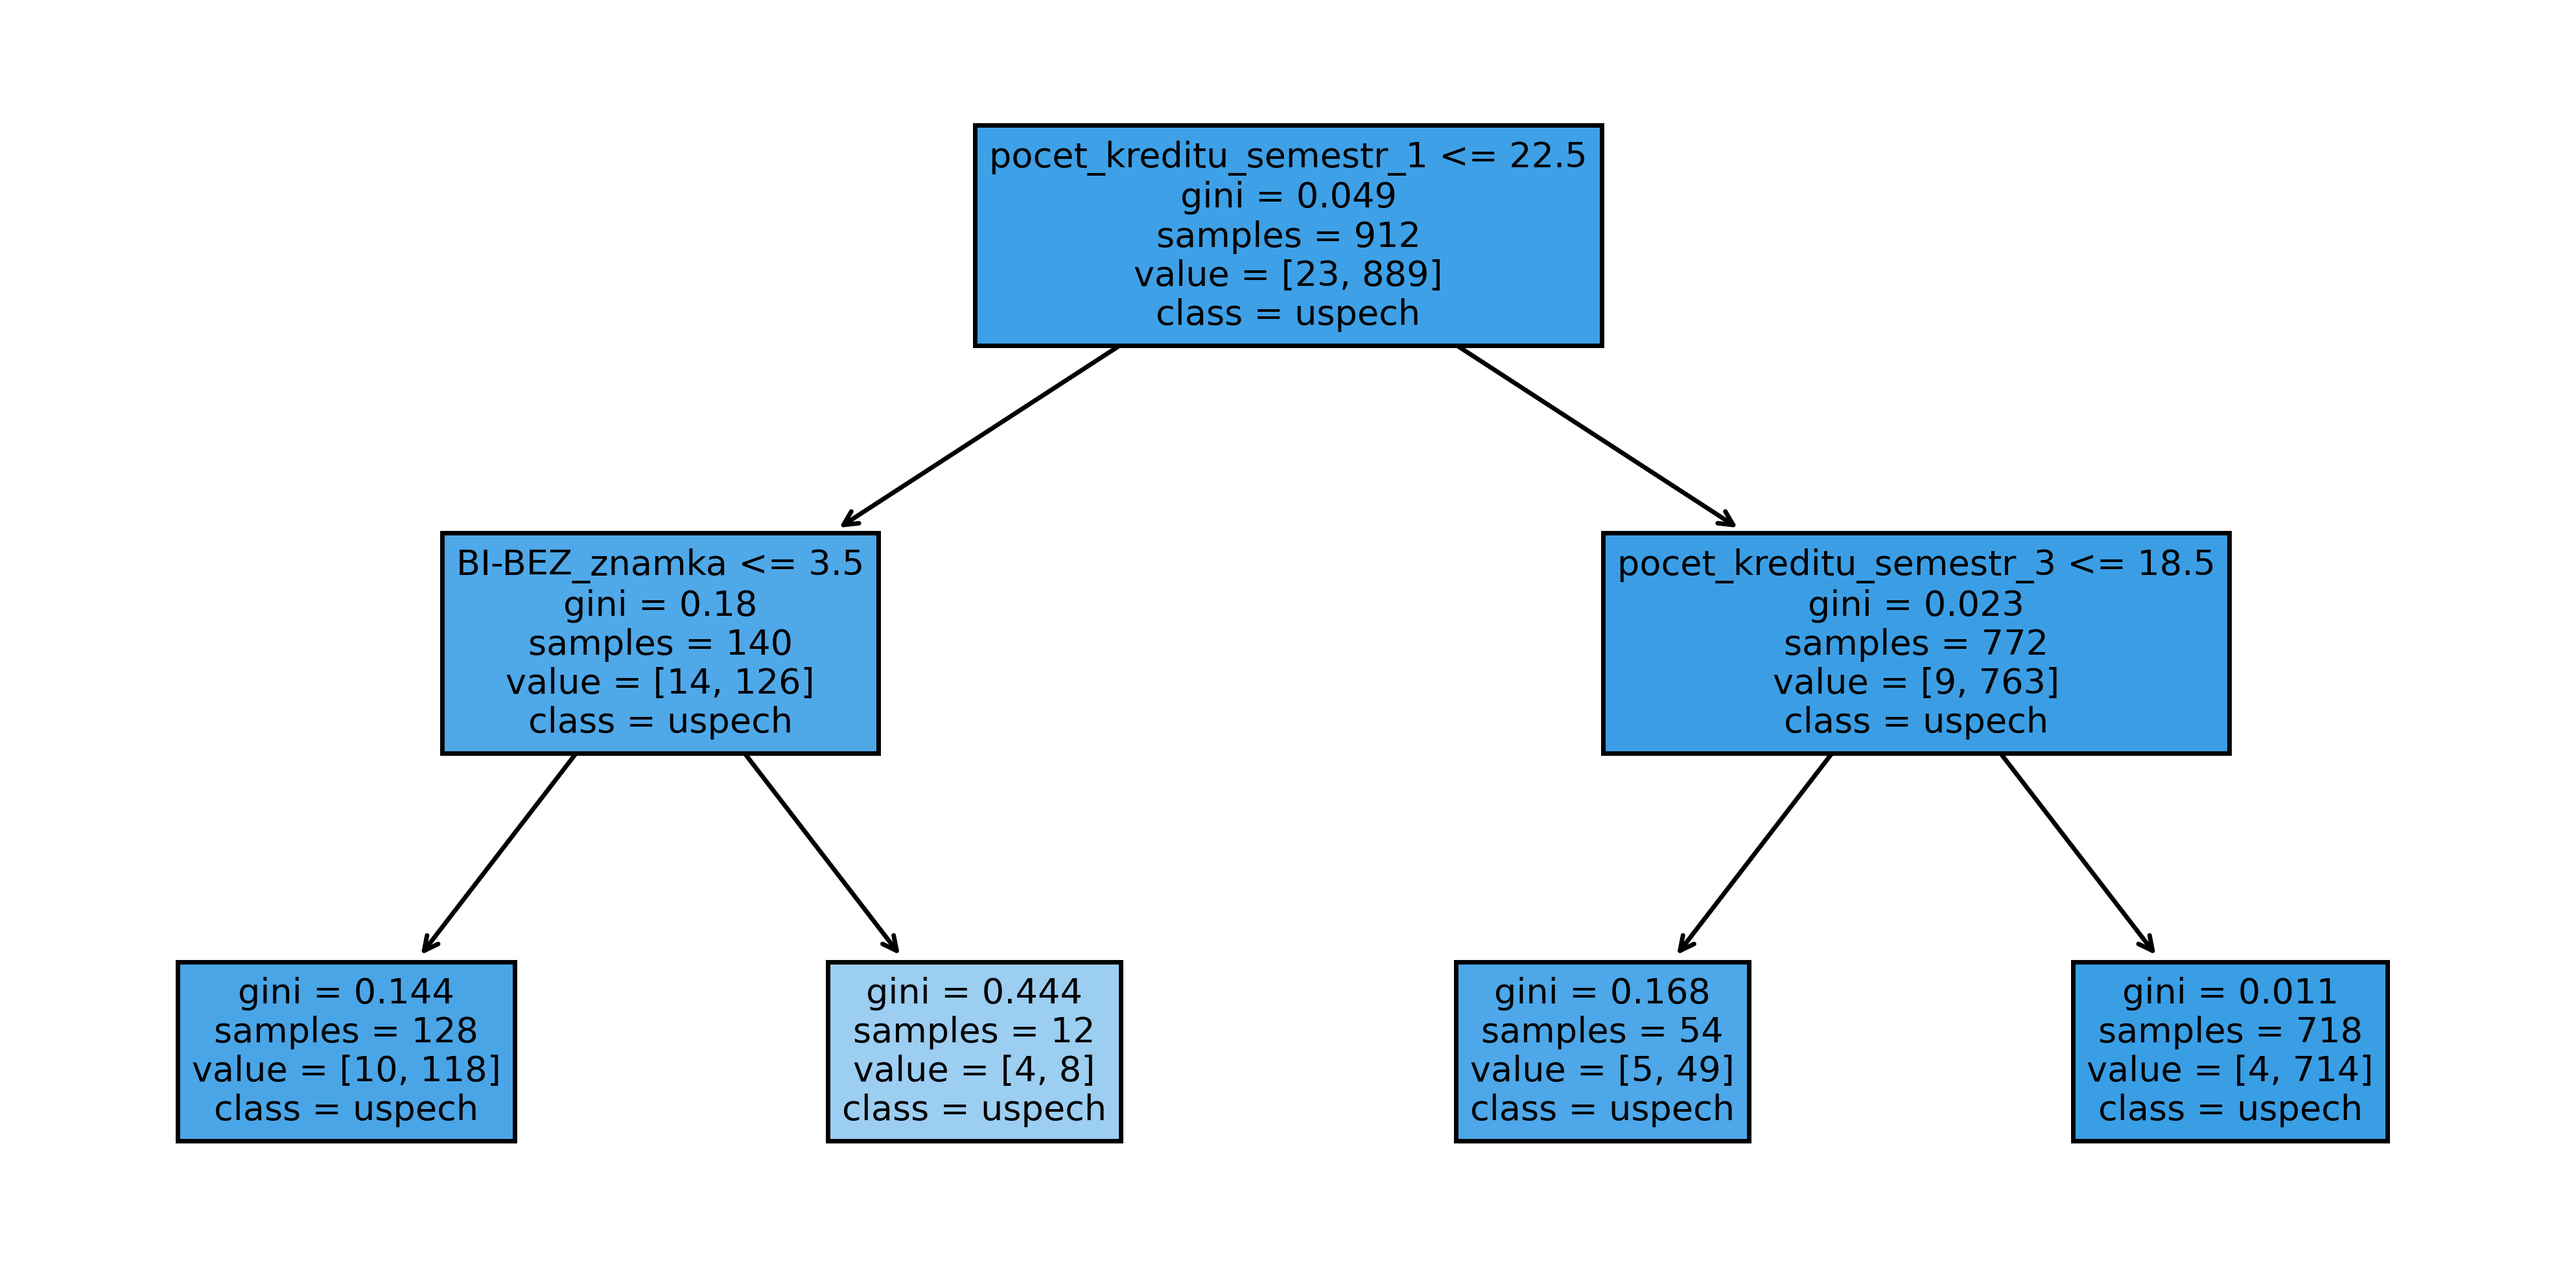

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(dt_f1.best_estimator_,
               feature_names = Xdata.columns, 
               class_names=['neuspech', 'uspech'],
               filled = True);
path_file = os.sep.join(['decision_trees', 'tree_f1_semestr5.png'])
fig.savefig(path_file)

#### Random forest

In [17]:
param_grid_rf = {
    'criterion':['gini','entropy'],
    'n_estimators': range(5, 50, 5),
    'max_depth': range(2, 4),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf':[10]
}

In [18]:
rf_f1 = get_best_parameters(param_grid_rf, RandomForestClassifier)

Best hyper-parameters are: 
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}

0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 5}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 10}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 15}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 20}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 25}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 30}
0.987230 (+/-0.002710) for {'criterion': 'gini', 'max_depth': 2, 'max

In [19]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, rf_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf_f1.predict(Xtest))))

accuracy score (train): 0.974781
accuracy score (test): 0.973684


In [20]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':rf_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
28,pocet_kreditu_semestr_3,0.233583
24,BI-ZDM_znamka,0.222982
12,pocet_kreditu_semestr_1,0.178418
22,BI-AAG_znamka,0.080305
13,BI-PA2_znamka,0.066786
3,BI-PAI_poradi_zapisu,0.063114
10,BI-ZMA_znamka,0.055804
1,BI-PA1_poradi_zapisu,0.046978
6,BI-PS1_znamka,0.044453
18,BI-SAP_poradi_zapisu,0.004955


#### Adaboost

In [21]:
param_grid_ab = {
    'n_estimators': range(5, 50, 5),
    'learning_rate': np.arange(0.1, 1., 0.1)
}

In [22]:
ab_f1 = get_best_parameters(param_grid_ab, AdaBoostClassifier)

Best hyper-parameters are: 
{'learning_rate': 0.1, 'n_estimators': 5}

0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 5}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 10}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 15}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 20}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 25}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 30}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 35}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 40}
0.987230 (+/-0.002710) for {'learning_rate': 0.1, 'n_estimators': 45}
0.987230 (+/-0.002710) for {'learning_rate': 0.2, 'n_estimators': 5}
0.987230 (+/-0.002710) for {'learning_rate': 0.2, 'n_estimators': 10}
0.987230 (+/-0.002710) for {'learning_rate': 0.2, 'n_estimators': 15}
0.987230 (+/-0.002710) for {'learning_rate': 0.2, 'n_estimators': 20}
0.987230 (+/-0.002710

In [23]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, ab_f1.predict(Xtrain))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, ab_f1.predict(Xtest))))

accuracy score (train): 0.974781
accuracy score (test): 0.973684


In [24]:
feature_importances=pd.DataFrame({'features':Xtrain.columns,'feature_importance':ab_f1.best_estimator_.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
24,BI-ZDM_znamka,0.4
12,pocet_kreditu_semestr_1,0.4
28,pocet_kreditu_semestr_3,0.2
0,BI-PA1_znamka,0.0
26,BI-AG1_znamka,0.0
21,pocet_kreditu_semestr_2,0.0
22,BI-AAG_znamka,0.0
23,BI-AAG_poradi_zapisu,0.0
25,BI-ZDM_poradi_zapisu,0.0
27,BI-AG1_poradi_zapisu,0.0


#### Xgboost

In [25]:
param_grid = {
    'eta': np.arange(0.1, 1., 0.1),
    'max_depth': range(3, 8)
}
param_comb = ParameterGrid(param_grid)

In [26]:
xgb_f1 = get_best_parameters(param_grid, XGBClassifier, True)

Best hyper-parameters are: 
{'eta': 0.30000000000000004, 'max_depth': 6}

0.985531 (+/-0.008260) for {'eta': 0.1, 'max_depth': 3}
0.984967 (+/-0.008397) for {'eta': 0.1, 'max_depth': 4}
0.984967 (+/-0.008397) for {'eta': 0.1, 'max_depth': 5}
0.984967 (+/-0.008397) for {'eta': 0.1, 'max_depth': 6}
0.984401 (+/-0.009113) for {'eta': 0.1, 'max_depth': 7}
0.983838 (+/-0.008240) for {'eta': 0.2, 'max_depth': 3}
0.984974 (+/-0.005688) for {'eta': 0.2, 'max_depth': 4}
0.984404 (+/-0.007610) for {'eta': 0.2, 'max_depth': 5}
0.984974 (+/-0.005688) for {'eta': 0.2, 'max_depth': 6}
0.984410 (+/-0.004448) for {'eta': 0.2, 'max_depth': 7}
0.983274 (+/-0.007086) for {'eta': 0.30000000000000004, 'max_depth': 3}
0.983841 (+/-0.006541) for {'eta': 0.30000000000000004, 'max_depth': 4}
0.983838 (+/-0.008240) for {'eta': 0.30000000000000004, 'max_depth': 5}
0.985540 (+/-0.004149) for {'eta': 0.30000000000000004, 'max_depth': 6}
0.983844 (+/-0.005458) for {'eta': 0.30000000000000004, 'max_depth': 7}
0.9832

In [27]:
print('accuracy score XGBoost (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, xgb_f1.predict(Xtrain))))
print('accuracy score XGBoost (val): {0:.6f}'.format(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest))))

accuracy score XGBoost (train): 1.000000
accuracy score XGBoost (val): 0.969298


In [28]:
feat_imp = pd.Series(xgb_f1.best_estimator_.get_booster().get_fscore()).sort_values(ascending=False)

In [29]:
feat_imp

pocet_kreditu_semestr_1    40.0
pocet_kreditu_semestr_4    37.0
pocet_kreditu_semestr_2    35.0
BI-LIN_znamka              31.0
BI-PSI_znamka              26.0
pocet_kreditu_semestr_3    26.0
BI-BEZ_znamka              24.0
BI-OSY_znamka              24.0
BI-CAO_znamka              23.0
BI-DBS_znamka              23.0
BI-AAG_znamka              22.0
BI-PA2_znamka              21.0
BI-ZDM_znamka              21.0
BI-ZMA_znamka              20.0
BI-AG1_znamka              19.0
BI-PAI_znamka              18.0
BI-PA1_znamka              17.0
BI-SAP_znamka              15.0
BI-PS1_znamka              14.0
BI-PA2_poradi_zapisu       13.0
BI-MLO_znamka              13.0
BI-ZMA_poradi_zapisu       10.0
BI-LIN_poradi_zapisu       10.0
BI-PS1_poradi_zapisu        9.0
BI-PA1_poradi_zapisu        5.0
BI-AG1_poradi_zapisu        4.0
BI-OSY_poradi_zapisu        3.0
BI-BEZ_poradi_zapisu        3.0
BI-MLO_poradi_zapisu        3.0
BI-ZDM_poradi_zapisu        3.0
BI-PSI_poradi_zapisu        1.0
dtype: f

#### MLP

In [30]:
mlp = MLPClassifier(random_state=1, max_iter=500).fit(Xtrain, ytrain)

In [31]:
print('accuracy score mlp (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, mlp.predict(Xtrain))))
print('accuracy score mlp (val): {0:.6f}'.format(metrics.accuracy_score(ytest, mlp.predict(Xtest))))

accuracy score mlp (train): 0.992325
accuracy score mlp (val): 0.978070


#### Lineární regrese

In [32]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [33]:
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtrain), np.array(ytrain))))
print('RMSE reg (test):', np.sqrt(mean_squared_error(reg.predict(Xtest), np.array(ytest))))

RMSE reg (test): 0.1484172189589129
RMSE reg (test): 0.1613888525731647


#### kNN

In [34]:
param_grid = {
    'n_neighbors' : range(1, 12), # Počet nejbližších sousedů
    'p': range(1, 3), # Stupeň Minkowského vzdálenosti
    'weights': ['uniform', 'distance'], # Aritmetický, nebo vážený průměr
}
param_comb = ParameterGrid(param_grid)

In [35]:
knn = get_best_parameters(param_grid, KNeighborsClassifier)

Best hyper-parameters are: 
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

0.975181 (+/-0.014339) for {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.975181 (+/-0.014339) for {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.972887 (+/-0.012420) for {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.972887 (+/-0.012420) for {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.963511 (+/-0.012662) for {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.974609 (+/-0.013674) for {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.958717 (+/-0.014398) for {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.972887 (+/-0.012420) for {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.984401 (+/-0.006769) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.983831 (+/-0.008293) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.985518 (+/-0.004238) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.985518 (+/-0.004238) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.98

In [36]:
print('accuracy score knn (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, knn.predict(Xtrain))))
print('accuracy score knn (val): {0:.6f}'.format(metrics.accuracy_score(ytest, knn.predict(Xtest))))

accuracy score knn (train): 0.974781
accuracy score knn (val): 0.973684


## Výsledky

In [37]:
results = pd.DataFrame(columns=['vysledky'], index=['dt', 'rf', 'ab', 'xgb', 'mlp', 'knn'])

### Měřeno accuracy_score

In [38]:
results.loc['dt', 'vysledky'] = round(metrics.accuracy_score(ytest, dt_f1.predict(Xtest)), 3)
results.loc['rf', 'vysledky'] = round(metrics.accuracy_score(ytest, rf_f1.predict(Xtest)), 3)
results.loc['ab', 'vysledky'] = round(metrics.accuracy_score(ytest, ab_f1.predict(Xtest)), 3)
results.loc['xgb', 'vysledky'] = round(metrics.accuracy_score(ytest, xgb_f1.predict(Xtest)), 3)
results.loc['mlp', 'vysledky'] = round(metrics.accuracy_score(ytest, mlp.predict(Xtest)), 3)
results.loc['knn', 'vysledky'] = round(metrics.accuracy_score(ytest, knn.predict(Xtest)), 3)

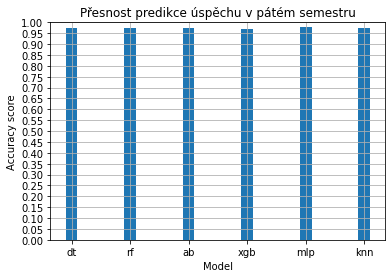

In [39]:
fig, ax = plt.subplots()
width = 0.2
ax.bar(results.index, results['vysledky'].values, width)

ax.set_ylabel('Accuracy score')
ax.set_xlabel('Model')
ax.set_title('Přesnost predikce úspěchu v pátém semestru')

ax.grid(True)
y_values = np.arange(0.0, 1.05, 0.05)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.yticks(y_values)
plt.show()

In [40]:
results

,vysledky
dt,0.974
rf,0.974
ab,0.974
xgb,0.969
mlp,0.978
knn,0.974


In [41]:
mlp.predict(Xtest)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.